<a href="https://colab.research.google.com/github/xoxominji/22-1-ESAA-Practice/blob/main/0530_%EB%B0%95%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [필사]

## 파이썬 딥러닝 텐서플로 PART03 케라스(Keras)

### 3.1 딥러닝 준비

텐서플로 라이브러리를 백엔드로 지원하는 케라스 사용

#### 주요 용어

- **하이퍼파라미터**: 사용자가 직접 설정해야하는 값들
- **과소적합**: 모델이 충분히 학습되지 않아 예측 성능이 떨어진 경우 (epoch 늘리기)
- **과대적합**: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태 (epoch 줄이기)
- **에포크(epoch)**: 모델이 훈련을 할 때 데이터셋 전부 학습에 사용하는 횟수
- **손실함수(loss function)**: 예측 값과 정답 값의 차이 또는 오차(Error)
  - 이진 분류 문제: `'binary_crossentropy'` - 활성화 함수 'sigmoid'
  - 다중 분류 문제(one-hot vector): `'categorical_crossentropy'` - 활성화 함수 'softmax'
  - 다중 분류 문제(레이블 값 0, 1, 2, ...): `'sparse_categorical_crossentropy'` - 활성화 함수 'softmax'
  ```
  import tensorflow as tf
  #클래스
  tf.keras.losses.BinaryCrossentropy()
  #함수
  tf.keras.losses.binary_crossentropy
  ```
- 경사하강법(gradient descent): 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법


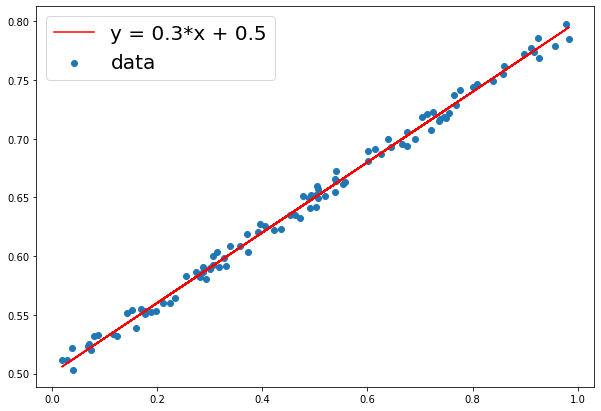

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

> $y=0.3x+0.5$에 노이즈가 추가된 것

- 가설함수를 $\hat{y}=wx+b$
- 손실함수는 $\frac{1}{2}Σ(y-\hat{y})^2$
- α는 학습률(learning rate)을 의미

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.20524, b = 0.32867 error = 16.33142
------------------------------------------------------------
 5 w = 0.3, b = 0.5 error = 0.00284


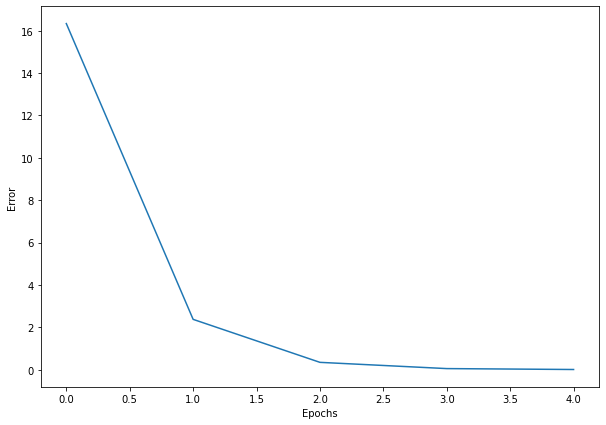

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

#### 딥러닝 프로세스
1. 데이터 전처리
  - 배열 차원 변겅, 스케일 조정
2. 모델 생성
  - 순차적 구조: Sequential API
  - 다중 입력 및 출력: Functional API
  - Model Subclassing
3. 모델 컴파일 `compile()`
  - 손실함수
  - 옵티마이저
  - 평가지표
4. 모델 훈련 `fit()`
  - 훈련 데이터셋
  - 검증 데이터셋
  - epoch
  - batch
  - callback 함수
5. 모델 검증
5. 모델 예측

### 3.2 단순 신경망 훈련

#### 선형 회귀

회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

$y=wx+b$

- $w$: 가중치(weight)
- $b$: 편향(bias)

#### 뉴런(Neuron)
: 인공신경망 모델 구성하는 하나의 신경 (=노드)

#### Dense 레이어

: 기본 레이어

모델 -> n개의 Dense 레이어 -> 각 레이어에 n개의 노드/뉴런 각 각 지정 가능



```
import tensorflow as tf
#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)
#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='rulu')
```

#### 데이터셋 만들기


In [ ]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


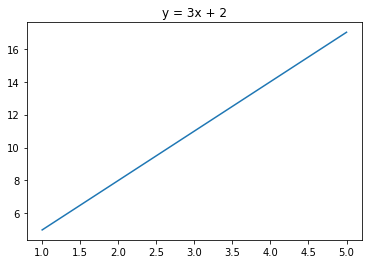

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

#### Sequential API

층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

**모델 구조**
1. 리스트형

In [ ]:
import tensorflow as tf
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

2. add함수 사용

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**입력 데이터 형태**

첫 번째 층은 input_shape 매개변수를 지정할 것

In [ ]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정, (4,)도 가능
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

**단순선형회귀 모델 정의**

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #입력변수 1개 #use_bias(상수항)=True 기본설정          
])

**모델 요약**

`model.summary()`

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- `Total params`: 모델 내부에 존재하는 모든 파라미터의 합계
- `Trainable params`: 모델 훈련 시 업데이트할 파라미터의 총 개수
- `Non-trainable params`: 모델 훈련 시 업데이트하지 않을 파라미터의 총 개수

**컴파일**

: 모델 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 정의

1. 클래스 인스턴스 방법

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2. 함수 지정 방법

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

3. 사전 정의된 문자열 지정 방법

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 단순선형회귀 모델 훈련을 위한 컴파일
model.compile(optimizer='sgd', loss='mse', metrics='mae')

**훈련**

In [ ]:
# 훈련
history = model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 753ms/step - loss: 57.2152 - mae: 7.1620
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 33.4918 - mae: 5.5231
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 19.6659 - mae: 4.2718
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.6079 - mae: 3.3164
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 6.9111 - mae: 2.5869


> 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었음(과소적합)

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 529ms/step - loss: 137.5406 - mae: 10.9437
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 80.2407 - mae: 8.3972
Epoch 3/1200
1/1 [==============================] - 0s 7ms/step - loss: 46.8486 - mae: 6.4531
Epoch 4/1200
1/1 [==============================] - 0s 16ms/step - loss: 27.3887 - mae: 4.9689
Epoch 5/1200
1/1 [==============================] - 0s 13ms/step - loss: 16.0479 - mae: 3.8357
Epoch 6/1200
1/1 [==============================] - 0s 6ms/step - loss: 9.4384 - mae: 2.9706
Epoch 7/1200
1/1 [==============================] - 0s 8ms/step - loss: 5.5861 - mae: 2.3099
Epoch 8/1200
1/1 [==============================] - 0s 7ms/step - loss: 3.3406 - mae: 1.8055
Epoch 9/1200
1/1 [==============================] - 0s 7ms/step - loss: 2.0315 - mae: 1.4203
Epoch 10/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.2680 - mae: 1.1261
Epoch 11/1200
1/1 [==============================] - 0s 6m

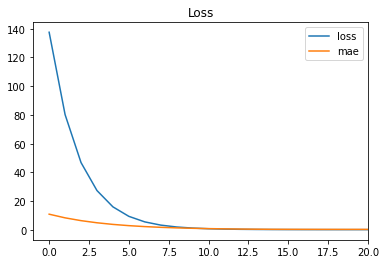

In [ ]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

> 첫 10 epoch까지 손실이 급격히 감소함

**검증**

`evaluate()`

In [ ]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 0s 203ms/step - loss: 6.3899e-05 - mae: 0.0069


[6.389857298927382e-05, 0.0068611144088208675]

**예측**

`predict(x인자)`

In [ ]:
# 예측
model.predict([10])

array([[32.03316]], dtype=float32)

> x=10일 때, y=3x+2, y=32 감안하면 정답에 꽤 근사한 값임

### 3.3 심층 신경망으로 이미지 분류

#### 케라스 내장 데이터셋 로드

<`tensorflow.keras.datasets` 서브패키지 지원 샘플 데이터셋>
- boston_housing : 보스톤 주택 가격 데이터셋(회귀) 
- cifar10 : CIFAR10 이미지 분류 데이터셋(분류) 
- cifar100 : CIFAR100 이미지 분류 데이터셋(분류) 
- mnist : mnist 손글씨 데이터셋(분류) 
- fashion_mnist : 의류 데이터셋(분류) 
- imdb : IMDb 영화 데이터셋(분류) 
- reuters : Reuters 뉴스 토픽(분류)

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


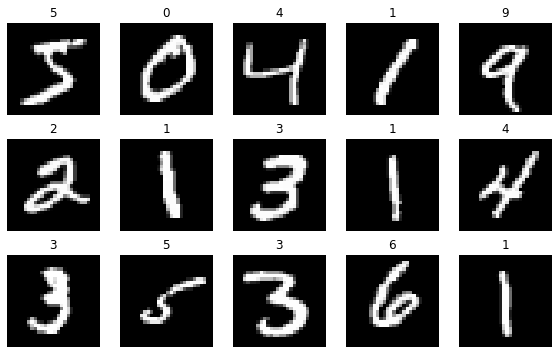

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

> 0~9까지 총 10개의 정답 레이블로 구성

#### 데이터 전처리

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

> 0~255 범위의 값으로 이루어진 이미지를 구성하는 하나의 픽셀 값과 매칭되는 원소

In [ ]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

#### Faltten 레이어

: 다차원의 데이터를 1차원으로 펼쳐주는 방법 (Dense 레이어에 2차원 이상 데이터를 입력값으로 넣을 수 없기 때문)

In [ ]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [ ]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


#### 활성화 함수

: 입력을 비선형 출력으로 변환해주는 함수

- `Sigmoid`
- `tanh`
- `ReLU`
- `Leaky ReLU`

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

#배치 정규화를 적용한 후 활성화 함수를 적용하기

**입력과 출력**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

#### 손실함수

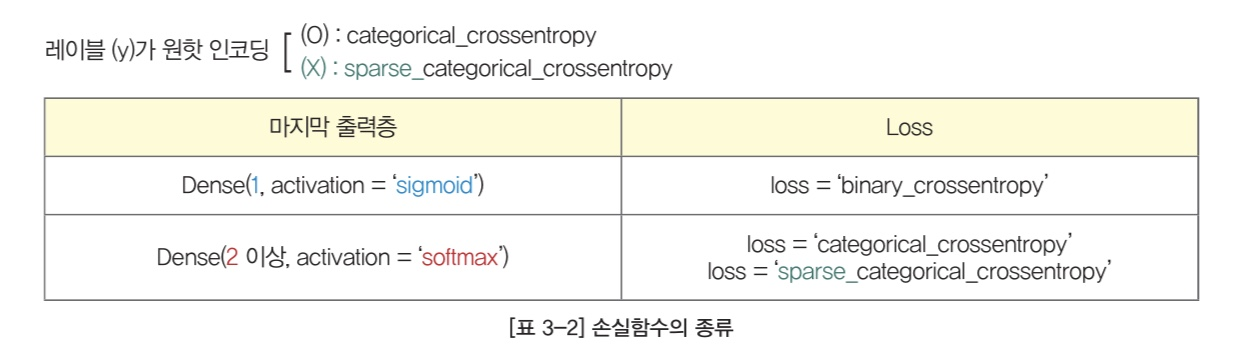

In [ ]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

**옵티마이저**

: 손실을 낮추기 위해서, 신경망의 가중치와 합습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

- SGD
- Adam
- Adagrad
- Nadam
- RMSprop
- Adadelta
- Adamax
- Ftrl

In [ ]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### 평가지표

- `accuracy('acc')`
- `auc`
- `precision`
- `recall`

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#### 훈련

In [ ]:
# 훈련
model.fit(x_train, y_train, 
          # 검증셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2308 - accuracy: 0.9315 - val_loss: 0.1194 - val_accuracy: 0.9632
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0965 - accuracy: 0.9697 - val_loss: 0.1005 - val_accuracy: 0.9683
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0658 - accuracy: 0.9792 - val_loss: 0.0846 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 0.0766 - val_accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0810 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0849 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.0816 - val_accuracy

#### 평가

In [ ]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9813
검증셋 정확도: 0.9812999963760376


#### 예측

: 훈련된 모델로 새로운 이미지에 대한 분류 값을 예측하는 작업

In [ ]:
# 예측
predictions = model.predict(x_test)

In [ ]:
# 예측 결과 출력
predictions[0]

array([1.9323430e-11, 5.1118469e-08, 4.5321125e-15, 1.4917665e-08,
       3.6240593e-09, 7.3235029e-11, 1.9158183e-14, 9.9999976e-01,
       3.4239853e-13, 2.6859036e-07], dtype=float32)

가장 높은 확률 값을 가진 클래스가 최종 예측된 클래스: `argmax()`사용

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


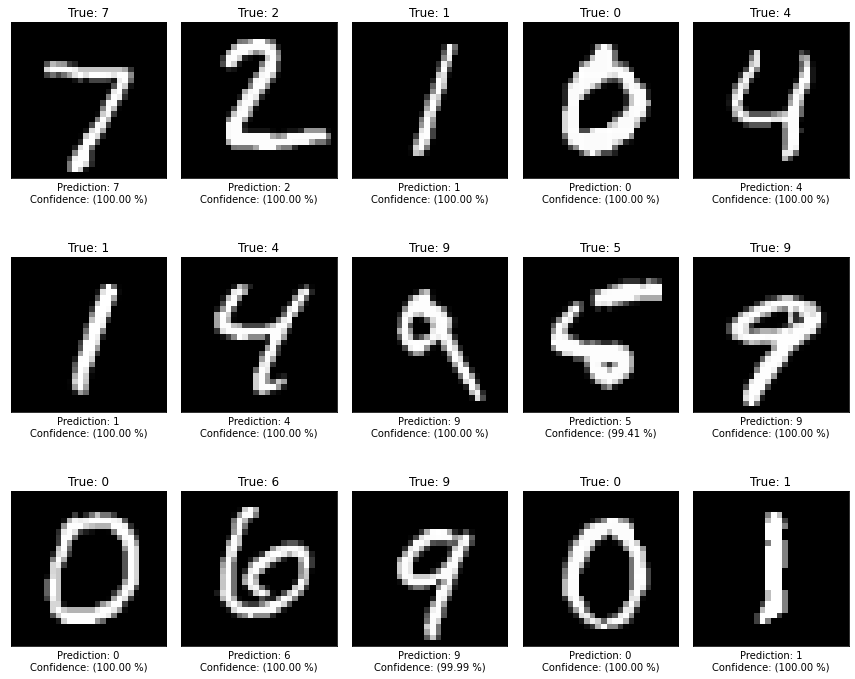

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

### 3.4 모델 세부 설정

In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


#### 초기값 설정

In [ ]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [ ]:
# he normal 초기화
## 방법 1. 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [ ]:
## 방법2. 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

- `glorot_normal`, `glorot_uniform`: 글로럿 초기화
- `lecun_normal`, `lecun_uniform`: Yann Lecun 초기화
- `he_normal`, `he_uniform`: He 초기화
- `random_normal`, `random_uniform`: 정규 분포, 연속균등 분포 초기화

#### 규제(Regularization)

In [ ]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_23',
 'trainable': True,
 'units': 256,
 'use_bias': True}

> 'kernel_regularizer': None

In [ ]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


#### 드롭아웃(Dropout)

: 모델의 과대적합 문제를 해결하기 위해 확률적으로 몇 개의 신호를 삭제

In [ ]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

#### 배치 정규화(Batch Normalization)

: 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화 함

In [ ]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

> 배치 정규화가 추가한 보델이 이전 대비 더 안정적이고 빠르게 수렴함

#### 활성화(activation) 함수


In [ ]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [ ]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                     

In [ ]:
# 서로 다른 세 모델 성능 비교

model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2898 - accuracy: 0.9140 - val_loss: 0.1623 - val_accuracy: 0.9526
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1303 - accuracy: 0.9610 - val_loss: 0.1177 - val_accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9707 - val_loss: 0.1149 - val_accuracy: 0.9650
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9764 - val_loss: 0.0907 - val_accuracy: 0.9716
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9798 - val_loss: 0.1041 - val_accuracy: 0.9685
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.1078 - val_accuracy: 0.9694
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0902 - val_accuracy:

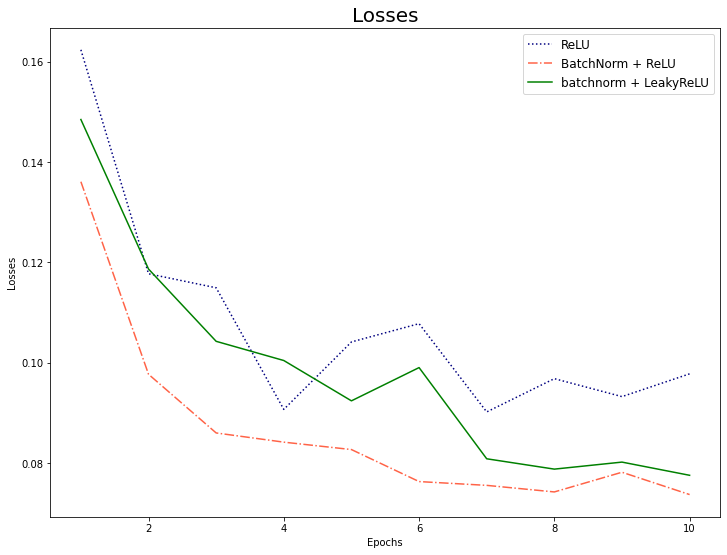

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

> mnist 데이터셋은 모델별 차이가 크진 않지만, 배치 정규화를 추가한 모델이 활성화 함수를 단독으로 사용한 경우보다 더 나을 것이라고 유추할 수 있음